# Hepatitis Patient survival Prediction
 

 This file tells about the various symptoms in case of a Hepatitis and whether the person suffering from Hepatitis lived or died.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Using the pandas as pd to read the CSV file

In [2]:
hepa=pd.read_csv("C:/Users/geeth/Downloads/hepatitis_csv.csv")

In [3]:
hepa

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


1. Age= age of the people.
2. Steroid=Whether the person is using any medicine or not.
3. Antivirals= If they are effective against virusses.
4. Fatigue=Feeling of being tired.
5. Malaise= If there is any body ache.
6. Anorexia=Weight loss.
7. liver big & liver firm= Inflamation of the liver.
8. Spleen palpable=If the spleen is enlarged.
9. spiders= Vascular lesions in patient.
10. ascites=fluid in the belly
11. varices= Varicose vein
12. bilirubin= pigment formed in the liver.
13. alkaline phospate & Sgot= enzyme made in liver cells.
14. albumin & protmine = protein made by the liver.
15. Histology = biopsy specimens. 

In [4]:
hepa.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


In [5]:
hepa.tail()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live
154,43,female,True,False,True,False,False,True,False,True,True,True,False,1.2,100.0,19.0,3.1,42.0,True,die


In [6]:
(hepa.shape,hepa.size)

((155, 20), 3100)

## Info of the dataset

In [7]:
hepa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

## Decribtion of the dataset

It describes the Mean,count,Max,min value of the numerical dataset


In [8]:
hepa.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


## Using isnull().Sum() checking is there is null values the dataset

In [9]:
hepa.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [10]:
hepa.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

## Using Fillna to filling the null values 

In [11]:
hepa['steroid'].fillna(hepa['steroid'].mode()[0],inplace=True)
hepa['fatigue'].fillna(hepa['fatigue'].mode()[0],inplace=True)
hepa['malaise'].fillna(hepa['fatigue'].mode()[0],inplace=True)
hepa['anorexia'].fillna(hepa['anorexia'].mode()[0],inplace=True)
hepa['liver_big'].fillna(hepa['liver_big'].mode()[0],inplace=True)
hepa['liver_firm'].fillna(hepa['liver_firm'].mode()[0],inplace=True)
hepa['spleen_palpable'].fillna(hepa['spleen_palpable'].mode()[0],inplace=True)
hepa['spiders'].fillna(hepa['spiders'].mode()[0],inplace=True)
hepa['ascites'].fillna(hepa['ascites'].mode()[0],inplace=True)
hepa['varices'].fillna(hepa['varices'].mode()[0],inplace=True)

In [12]:
hepa['bilirubin'].fillna(hepa['bilirubin'].mean(),inplace=True)
hepa['alk_phosphate'].fillna(hepa['alk_phosphate'].median(),inplace=True)
hepa['sgot'].fillna(hepa['sgot'].mean(),inplace=True)
hepa['albumin'].fillna(hepa['albumin'].mean(),inplace=True)
hepa['protime'].fillna(hepa['protime'].mean(),inplace=True)

In [13]:
print(hepa.sex.unique())
hepa["sex"].replace(['male', 'female'],[1,0],inplace=True)

['male' 'female']


Using Label Encoder


In [14]:
from sklearn.preprocessing import LabelEncoder
def label(a):
    l=LabelEncoder()
    hepa[a]=l.fit_transform(hepa[a])
en=['steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices','histology','class'] 
for i in en:
    label(i)


In [15]:
hepa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    int64  
 2   steroid          155 non-null    int64  
 3   antivirals       155 non-null    int64  
 4   fatigue          155 non-null    int64  
 5   malaise          155 non-null    int64  
 6   anorexia         155 non-null    int64  
 7   liver_big        155 non-null    int64  
 8   liver_firm       155 non-null    int64  
 9   spleen_palpable  155 non-null    int64  
 10  spiders          155 non-null    int64  
 11  ascites          155 non-null    int64  
 12  varices          155 non-null    int64  
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    float64
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    float64
 17  protime         

In [16]:
hepa

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,61.852273,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,61.852273,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,61.852273,0,1
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.000000,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85.0,200.0,4.0,61.852273,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,7.6,85.0,242.0,3.3,50.000000,1,0
151,44,0,1,0,1,0,0,1,1,0,0,0,0,0.9,126.0,142.0,4.3,61.852273,1,1
152,61,0,0,0,1,1,0,0,1,0,1,0,0,0.8,75.0,20.0,4.1,61.852273,1,1
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81.0,19.0,4.1,48.000000,1,1


In [17]:
hepa.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [18]:
hepa.describe()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.200000,0.103226,0.509677,0.154839,0.651613,0.400000,0.206452,0.838710,0.387097,0.193548,0.329032,0.129032,0.116129,1.427517,101.522581,85.894040,3.817266,61.852273,0.451613,0.793548
std,12.565878,0.305240,0.501527,0.362923,0.478004,0.491486,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,1.188301,47.082042,88.478932,0.616750,17.193528,0.499266,0.406070
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,14.000000,2.100000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,78.000000,32.500000,3.500000,57.000000,0.000000,1.000000
50%,39.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,85.000000,59.000000,3.900000,61.852273,0.000000,1.000000
75%,50.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.500000,119.500000,99.000000,4.200000,65.000000,1.000000,1.000000
max,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,295.000000,648.000000,6.400000,100.000000,1.000000,1.000000


## Visualizing the Data

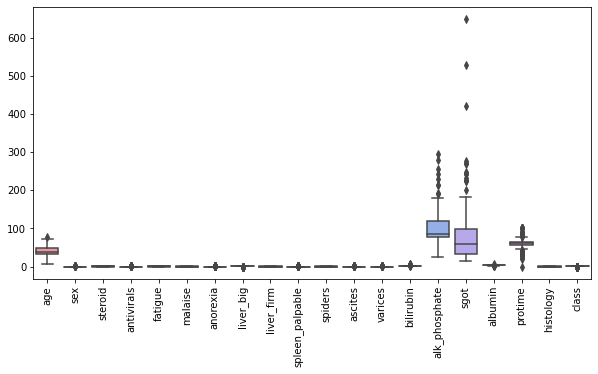

In [19]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data=hepa)
plt.show()

In [20]:
s=hepa.loc[:,['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia']]

In [21]:
s

,age,sex,steroid,antivirals,fatigue,malaise,anorexia
0,30,1,0,0,0,0,0
1,50,0,0,0,1,0,0
2,78,0,1,0,1,0,0
3,31,0,1,1,0,0,0
4,34,0,1,0,0,0,0
...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1
151,44,0,1,0,1,0,0
152,61,0,0,0,1,1,0
153,53,1,0,0,1,0,0


<AxesSubplot:>

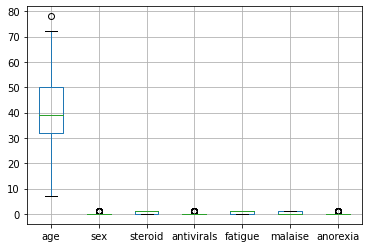

In [22]:
s.boxplot()

<AxesSubplot:xlabel='age'>

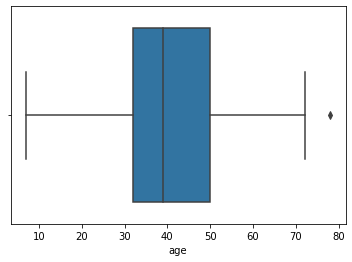

In [23]:
sns.boxplot(hepa['age'],data=hepa)

In [24]:
s2=hepa.loc[:,['liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites']]

<AxesSubplot:>

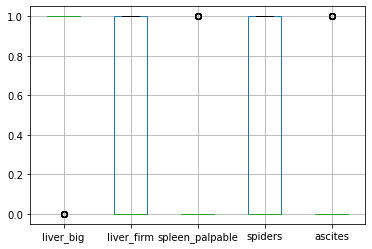

In [25]:
s2.boxplot()

In [26]:
s3=hepa.loc[:,['varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']]

<AxesSubplot:>

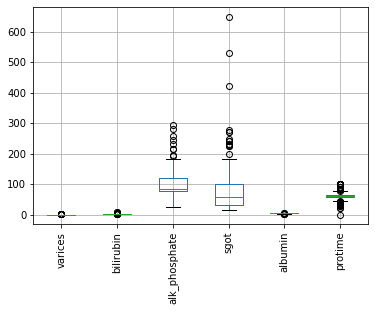

In [27]:
s3.boxplot(rot=90)

<AxesSubplot:>

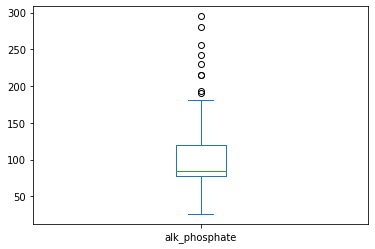

In [28]:
hepa['alk_phosphate'].plot(kind='box')

In [29]:
hepa=hepa[(hepa['alk_phosphate']<100 ) ]


<AxesSubplot:>

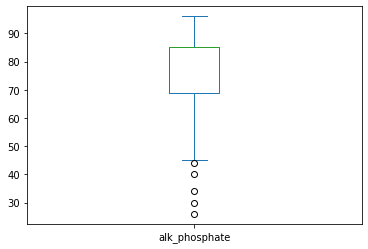

In [30]:
hepa['alk_phosphate'].plot(kind='box')

<AxesSubplot:>

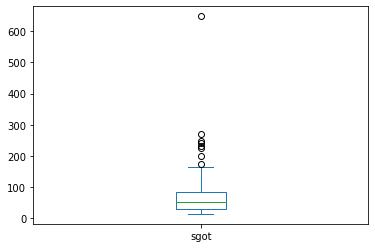

In [31]:
hepa['sgot'].plot(kind='box')

In [32]:
hepa=hepa[hepa['sgot']<100]

<AxesSubplot:>

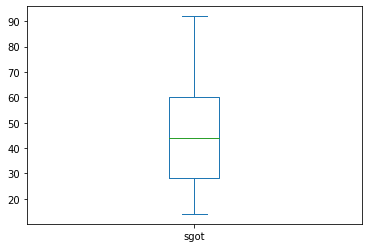

In [33]:
hepa['sgot'].plot(kind='box')

In [34]:
hepa.shape

(85, 20)

<AxesSubplot:xlabel='sex', ylabel='protime'>

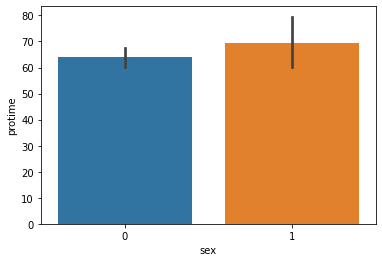

In [35]:
sns.barplot(x='sex',y='protime',data=hepa)

<AxesSubplot:xlabel='class', ylabel='count'>

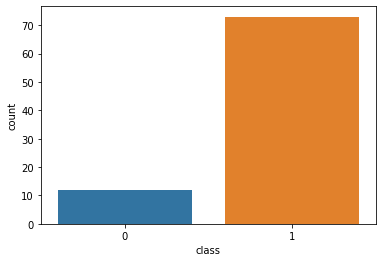

In [36]:
sns.countplot(x='class',data=hepa)

<AxesSubplot:xlabel='liver_big', ylabel='count'>

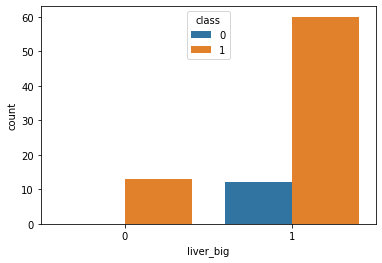

In [37]:
sns.countplot(x='liver_big',data=hepa,hue='class')

<AxesSubplot:xlabel='age', ylabel='albumin'>

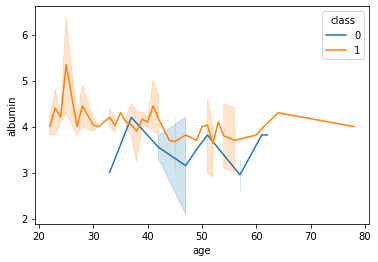

In [38]:
sns.lineplot(x="age",y="albumin",data=hepa,hue='class')

<AxesSubplot:xlabel='class', ylabel='count'>

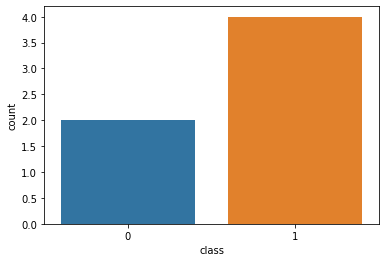

In [39]:
df1=hepa[(hepa['age']>60)]
sns.countplot(x='class',data=df1)

<AxesSubplot:xlabel='sex', ylabel='protime'>

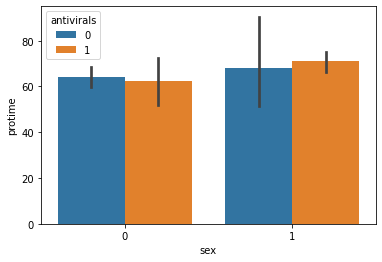

In [40]:
sns.barplot(x='sex',y='protime',data=hepa,hue='antivirals',)

<AxesSubplot:xlabel='alk_phosphate', ylabel='sgot'>

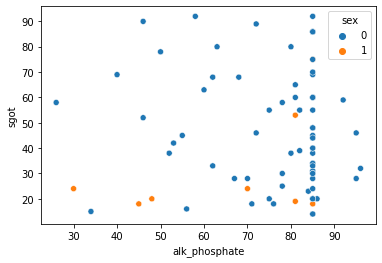

In [41]:
sns.scatterplot(x='alk_phosphate', y='sgot',data=hepa,hue='sex')

In [42]:
s4=hepa.loc[(hepa['bilirubin']>0)& (hepa['bilirubin']<1.4),['varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime','class']]

<AxesSubplot:xlabel='bilirubin', ylabel='albumin'>

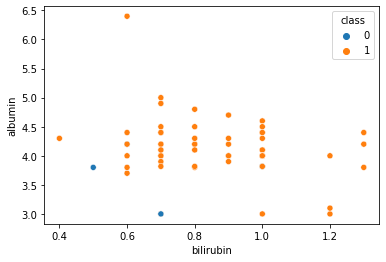

In [43]:
sns.scatterplot(x='bilirubin', y='albumin',data=s4,hue='class')

In [44]:
s5=hepa.loc[(hepa['albumin']>=3.5)& (hepa['albumin']<6),['varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime','class']]

<AxesSubplot:xlabel='albumin', ylabel='protime'>

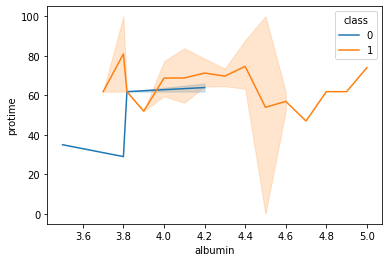

In [45]:
sns.lineplot(x='albumin', y='protime',data=s5,hue='class')

## Training  and Testing the data set

In [46]:
x=hepa.drop("class",axis=1)
y=hepa["class"]

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [48]:
X_train, X_test, y_train, y_test=train_test_split ( x, y, test_size=0.3)

In [49]:
X_train.shape, X_test.shape

((59, 19), (26, 19))

In [50]:
logis=LogisticRegression()

In [51]:
logis.fit(X_train,y_train)

LogisticRegression()

In [52]:
p=logis.predict(X_test)

In [53]:
p

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [54]:
acc=accuracy_score(y_test,p)

In [55]:
acc

0.8846153846153846

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
tree=DecisionTreeClassifier()

In [58]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
predict=tree.predict(X_test)

In [60]:
accuracy=accuracy_score(y_test,predict)

In [61]:
accuracy

0.9615384615384616

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
K_neighbors=KNeighborsClassifier(n_neighbors=7)

In [64]:
K_neighbors.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [65]:
knpredict=K_neighbors.predict(X_test)

In [66]:
knpredict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [67]:
knaccuracy=accuracy_score(y_test,knpredict)

In [68]:
knaccuracy

0.8846153846153846

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
nb=GaussianNB()

In [71]:
nb.fit(X_train,y_train)

GaussianNB()

In [72]:
nbpredict=nb.predict(X_test)

In [73]:
nbpredict

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [74]:
nbaccuracy=accuracy_score(y_test,nbpredict)

In [75]:
nbaccuracy

0.46153846153846156

In [76]:
from sklearn.svm import SVC

In [77]:
svc=SVC()

In [78]:
svc.fit(X_train,y_train)

SVC()

In [79]:
svcpredict=svc.predict(X_test)

In [80]:
svcpredict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [81]:
svc_accuracy=accuracy_score(y_test,svcpredict)

In [82]:
svc_accuracy

0.8846153846153846

In [83]:
print("\nThe highest accuracy score")
print("The accuracy score of LogisticRegression = ",acc)
print("The accuracy score of DecisionTreeClassifier = ",accuracy)
print("The accuracy score of KNeighborsClassifier = ",knaccuracy)
print("The accuracy score of GaussianNB = ",nbaccuracy)
print("The accuracy score of SVC= ",svc_accuracy)


The highest accuracy score
The accuracy score of LogisticRegression =  0.8846153846153846
The accuracy score of DecisionTreeClassifier =  0.9615384615384616
The accuracy score of KNeighborsClassifier =  0.8846153846153846
The accuracy score of GaussianNB =  0.46153846153846156
The accuracy score of SVC=  0.8846153846153846


In [85]:
age=int(input("Enter your Age : "))
print("\nIn the below values if Male = 1 and female = 0")
sex=int(input("\nEnter your sex : "))
print("\nIn the below values if YES/True = 1 and NO/false = 0")
steroid=int(input("Does the patient have 'steroid' in your : "))
antivirals=int(input("Does the patient have any antivirals: "))
fatigue=int(input("Do they have fatigue : "))
malaise=int(input("Does the pative has malaise : "))
anorexia=int(input("Is there anorexia : "))
liver_big=int(input("Is  their liver_big : "))
liver_firm=int(input("Is their liver_firm : "))
spleen_palpable=int(input("Is their is spleen_palpable  : "))
spiders=int(input("Does the patient have spiders : "))
ascites=int(input("Does the patient have ascites : "))
varices=int(input("Does the patient have varices : "))
print("\nEnter your values")
bilirubin=float(input("\nEnter the bilirubin value: "))
alk_phosphate=float(input("Enter the alk_phosphate value  : "))
sgot=float(input("Enter  sgot value: "))
albumin=float(input("Enter the albumin value: "))
protime=float(input("Enter the protime value : "))
histology=int(input("Is there histology: "))
tree.predict([[age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology]])
if tree.predict == 1:
    print("The patient will survive")
else:
    print("\n The patient's survival is low")
   

Enter your Age : 30

In the below values if Male = 1 and female = 0

Enter your sex : 1

In the below values if YES/True = 1 and NO/false = 0
Does the patient have 'steroid' in your : 0
Does the patient have any antivirals: 0
Do they have fatigue : 0
Does the pative has malaise : 0
Is there anorexia : 0
Is  their liver_big : 1
Is their liver_firm : 0
Is their is spleen_palpable  : 0
Does the patient have spiders : 0
Does the patient have ascites : 0
Does the patient have varices : 0

Enter your values

Enter the bilirubin value: 12.0
Enter the alk_phosphate value  : 32.0
Enter  sgot value: 50.0
Enter the albumin value: 1.0
Enter the protime value : 1.0
Is there histology: 0

 The patient's survival is low
